In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [ ]:
df=pd.read_csv("fashion-mnist_train.csv",sep=",")

In [ ]:
test_df=pd.read_csv("fashion-mnist_test.csv",sep=",")

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
#

In [ ]:
training = np.array(df,dtype='float32')
testing=np.array(test_df,dtype='float32')

9.0

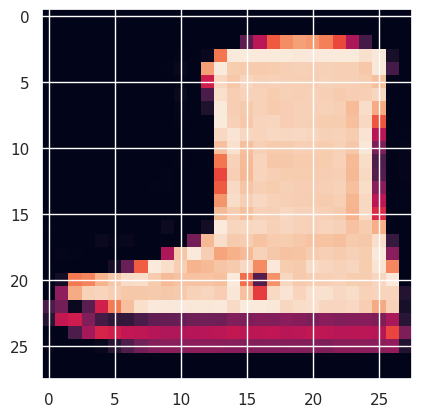

In [ ]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

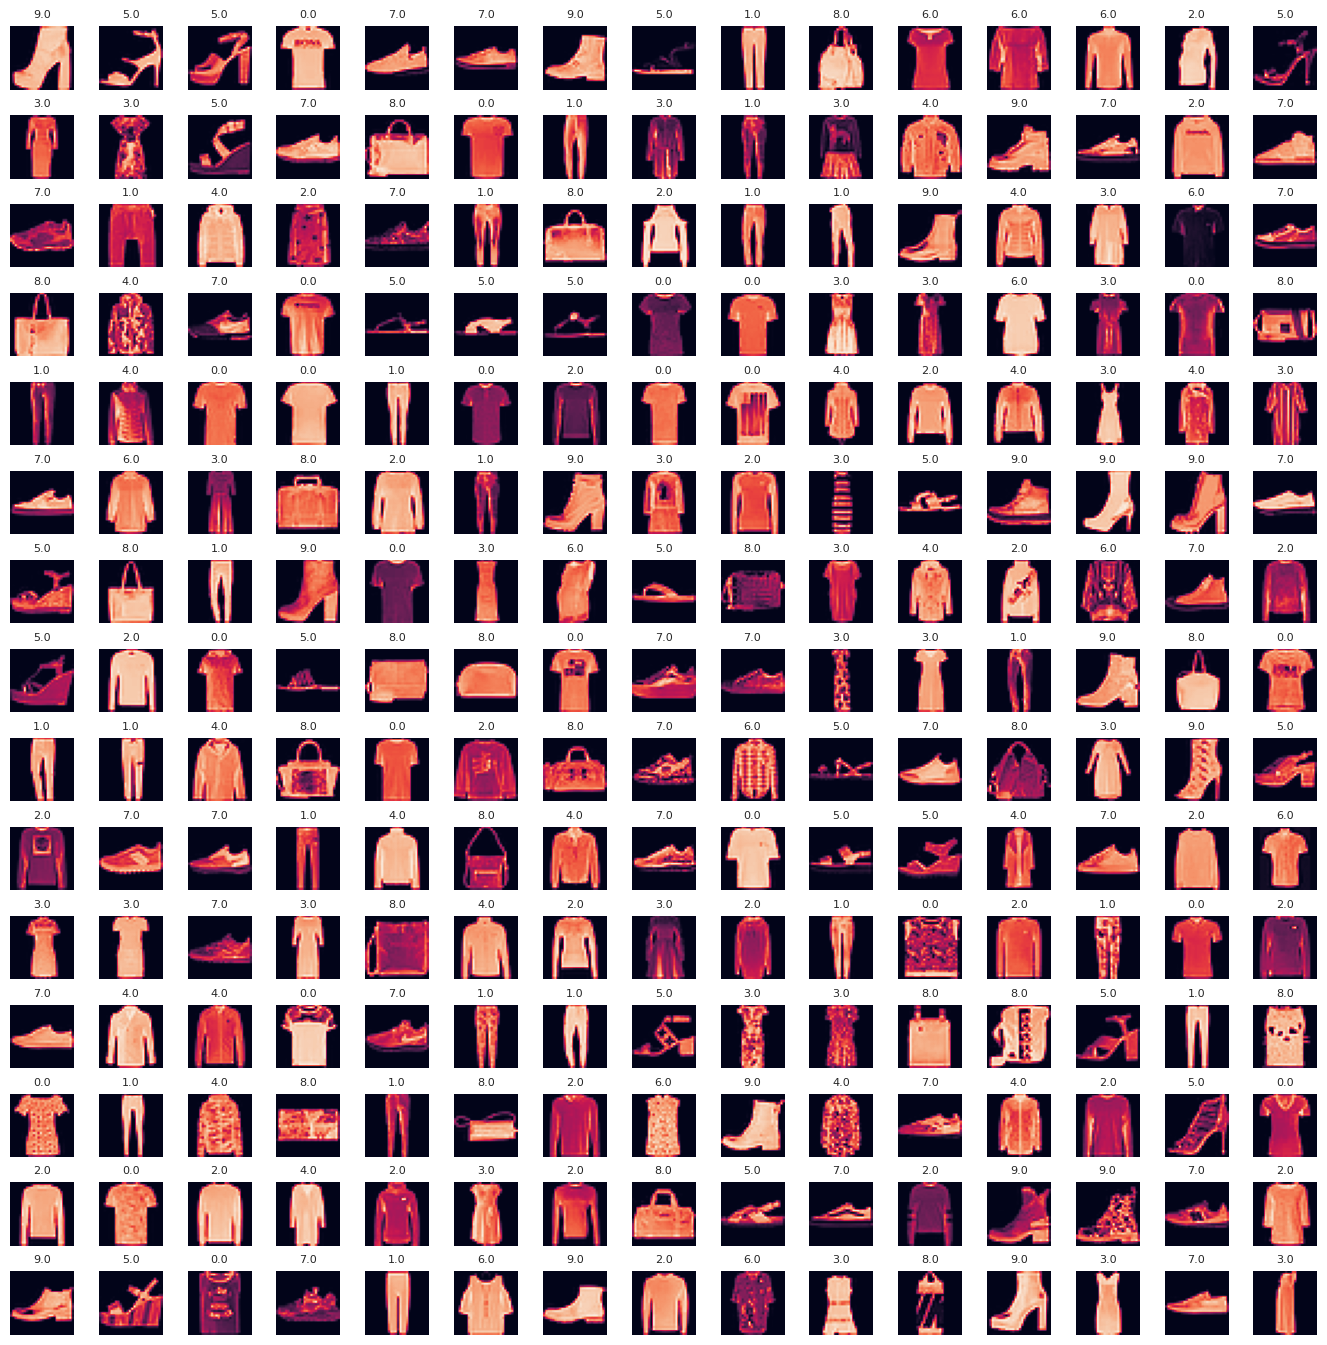

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [ ]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [ ]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [ ]:
X_validate.shape

(215, 28, 28, 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

In [ ]:
cnn_model.add(Conv2D(64,3,3,input_shape=(28,28,1),activation='relu'))

In [ ]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

In [ ]:
cnn_model.add(Flatten())

In [ ]:
cnn_model.add(Dense(32,activation='relu'))

In [ ]:
cnn_model.add(Dense(10,activation='sigmoid'))

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
epochs = 50

In [ ]:
cnn_model.fit(X_train,y_train,batch_size=512,epochs=50,verbose=1,validation_data=(X_validate,y_validate))

Epoch 1/50
2/2 [==============================] - 2s 236ms/step - loss: 2.2845 - accuracy: 0.1319 - val_loss: 2.2505 - val_accuracy: 0.2000
Epoch 2/50
2/2 [==============================] - 0s 75ms/step - loss: 2.2279 - accuracy: 0.2252 - val_loss: 2.2065 - val_accuracy: 0.2465
Epoch 3/50
2/2 [==============================] - 0s 63ms/step - loss: 2.1835 - accuracy: 0.2637 - val_loss: 2.1630 - val_accuracy: 0.2465
Epoch 4/50
2/2 [==============================] - 0s 84ms/step - loss: 2.1251 - accuracy: 0.3162 - val_loss: 2.1100 - val_accuracy: 0.2837
Epoch 5/50
2/2 [==============================] - 0s 79ms/step - loss: 2.0645 - accuracy: 0.3302 - val_loss: 2.0518 - val_accuracy: 0.3721
Epoch 6/50
2/2 [==============================] - 0s 74ms/step - loss: 1.9982 - accuracy: 0.3897 - val_loss: 1.9869 - val_accuracy: 0.4000
Epoch 7/50
2/2 [==============================] - 0s 74ms/step - loss: 1.9246 - accuracy: 0.4399 - val_loss: 1.9178 - val_accuracy: 0.4558
Epoch 8/50
2/2 [==========

In [ ]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7180 - accuracy: 0.7379
Test Accuracy:0.738


In [ ]:
predict_classes = cnn_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
classes_x = np.argmax(predict_classes,axis=1)

In [ ]:
classes_x

array([0, 1, 2, ..., 8, 2, 4])

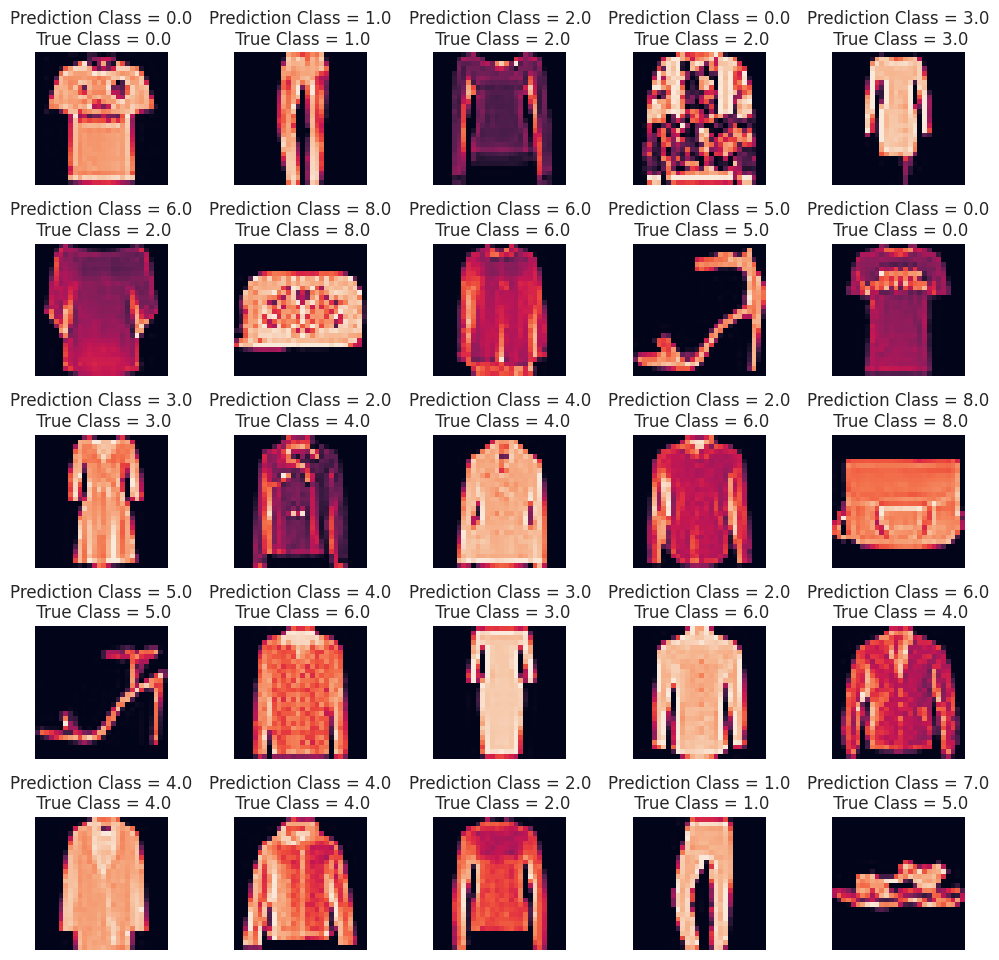

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(classes_x[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

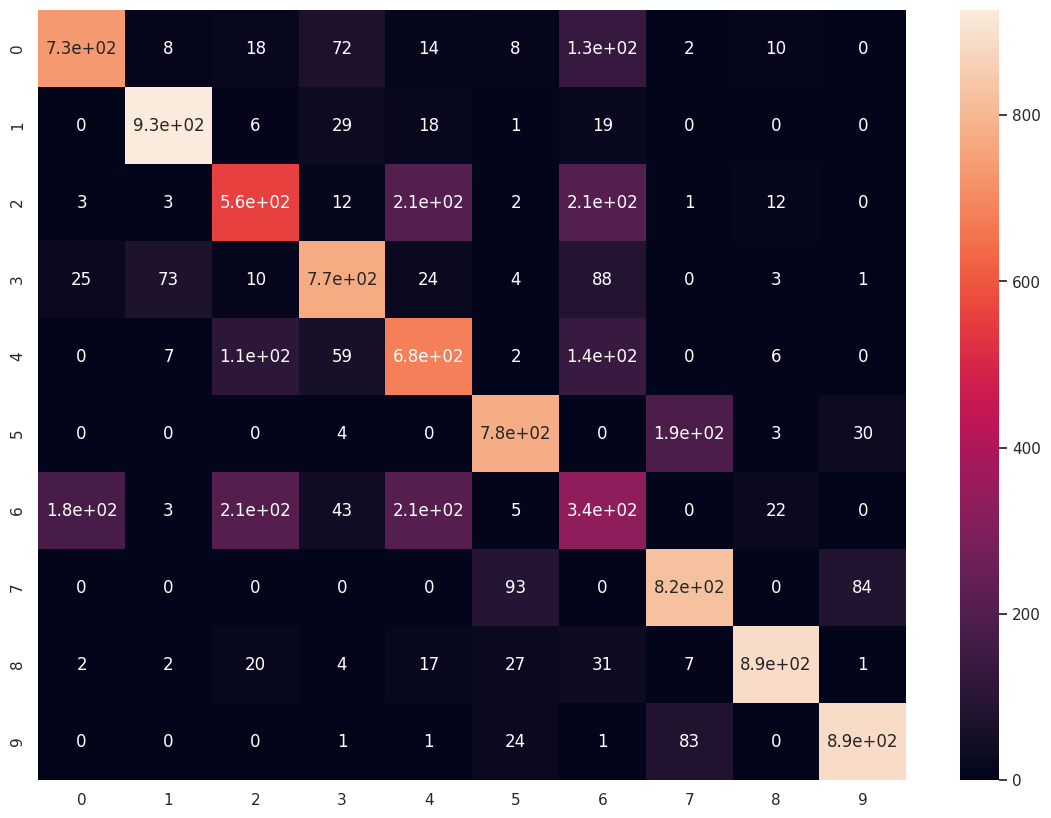

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, classes_x, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.73      0.76      1000
     Class 1       0.91      0.93      0.92      1000
     Class 2       0.60      0.56      0.58      1000
     Class 3       0.78      0.77      0.77      1000
     Class 4       0.58      0.68      0.63      1000
     Class 5       0.82      0.78      0.80      1000
     Class 6       0.35      0.34      0.34      1000
     Class 7       0.75      0.82      0.78      1000
     Class 8       0.94      0.89      0.91      1000
     Class 9       0.88      0.89      0.89      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

